## SGD (Stochastic Gradient Descent) 옵티마이저

SGD는 손실 함수의 기울기(gradient)를 사용하여 모델 파라미터를 점진적으로 업데이트하는 최적화 알고리즘이다. 전체 데이터셋이 아닌, 랜덤하게 선택된 **하나의 데이터 샘플**에 대한 기울기를 계산하여 파라미터를 업데이트하기 때문에 계산 효율이 높고 대규모 데이터셋 학습에 특히 효과적이다.

### 기본 설정
예시에 필요한 `numpy` 라이브러리를 임포트.

In [1]:
import numpy as np

### 예시 데이터 준비
간단한 선형 관계를 갖는 데이터를 생성. `y = 2x + 1` 관계에 약간의 노이즈(noise)를 추가하여 현실적인 데이터 흉내.

In [2]:
# 데이터 생성
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + np.random.randn(100, 1) # y = 1 + 2x + noise

# 데이터 확인 (첫 5개)
print("X (입력) 샘플:\n", X[:5])
print("y (정답) 샘플:\n", y[:5])

X (입력) 샘플:
 [[0.8356285 ]
 [0.44955233]
 [0.42660979]
 [1.87747808]
 [0.22317669]]
y (정답) 샘플:
 [[1.93521611]
 [1.60521491]
 [1.86927665]
 [3.73384817]
 [1.44616265]]


### SGD 구현 및 모델 학습

SGD 알고리즘을 직접 구현하여 모델의 최적 파라미터(가중치 `w`와 편향 `b`)를 찾아가는 과정.

1. `w`와 `b`를 임의의 값으로 초기화.
2. 각 epoch(전체 데이터셋 반복 횟수)마다 **데이터 순서를 섞음**.
3. 데이터 샘플 **하나씩** 반복하면서 예측값과 실제값의 오차를 계산.
4. 오차에 대한 기울기를 계산하여 `w`와 `b`를 업데이트 (경사 하강).
5. 이 과정을 모든 epoch 동안 반복.

In [3]:
# 하이퍼파라미터 설정
learning_rate = 0.01 # 학습률
n_epochs = 50       # 에포크 수

# 모델 파라미터(가중치, 편향) 초기화
w = np.random.randn(1, 1) # 가중치
b = np.random.randn(1, 1) # 편향

# 데이터 개수
m = len(X)

print(f"초기 가중치 w: {w[0][0]:.4f}, 초기 편향 b: {b[0][0]:.4f}")

# 학습 과정
for epoch in range(n_epochs):
    # 매 에포크마다 데이터 순서를 섞어줌 (Stochastic의 핵심)
    indices = np.random.permutation(m)
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    
    for i in range(m):
        # 데이터 샘플 하나 선택
        xi = X_shuffled[i:i+1]
        yi = y_shuffled[i:i+1]
        
        # 예측 (y_hat = w*x + b)
        y_pred = np.dot(xi, w) + b
        
        # 오차 계산
        error = y_pred - yi
        
        # 기울기(gradient) 계산
        # 손실 함수(MSE)를 w, b에 대해 각각 편미분한 결과
        gradient_w = 2 * xi.T.dot(error)
        gradient_b = 2 * np.sum(error)
        
        # 파라미터 업데이트
        w = w - learning_rate * gradient_w
        b = b - learning_rate * gradient_b
        
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1:2d}: w = {w[0][0]:.4f}, b = {b[0][0]:.4f}")

초기 가중치 w: 0.8666, 초기 편향 b: -0.5179
Epoch 10: w = 2.0766, b = 1.0939
Epoch 20: w = 2.0806, b = 1.0962
Epoch 30: w = 2.0611, b = 1.0818
Epoch 40: w = 1.9392, b = 0.9822
Epoch 50: w = 2.0866, b = 1.1167


### 학습 결과 확인

학습이 완료된 후의 최종 가중치 `w`와 편향 `b`를 확인. 우리가 생성한 데이터의 실제 값(`w=2`, `b=1`)에 근사하는지 비교.

In [4]:
print("===== 학습 완료 ====")
print(f"최종 가중치 w: {w[0][0]:.4f}")
print(f"최종 편향 b: {b[0][0]:.4f}")
print("실제 값: w=2, b=1")

===== 학습 완료 ====
최종 가중치 w: 2.0866
최종 편향 b: 1.1167
실제 값: w=2, b=1


### 학습된 모델 시각화

원본 데이터와 SGD를 통해 학습된 선형 회귀 직선을 함께 그려서 결과 확인.

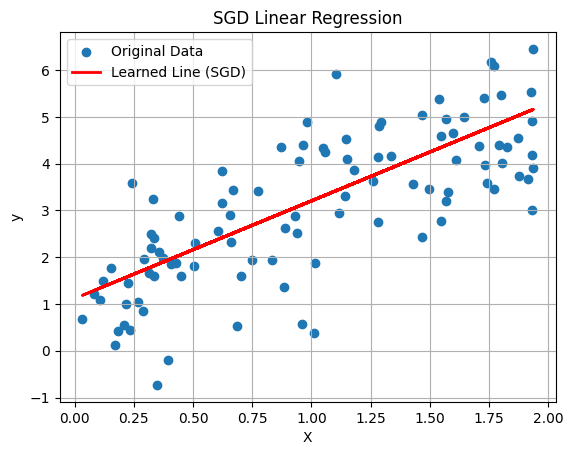

In [5]:
import matplotlib.pyplot as plt

# 산점도로 원본 데이터 시각화
plt.scatter(X, y, label='Original Data')

# 학습된 선형 회귀선 시각화
y_pred_line = w * X + b
plt.plot(X, y_pred_line, color='red', linewidth=2, label='Learned Line (SGD)')

plt.xlabel('X')
plt.ylabel('y')
plt.title('SGD Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

### 흔히 발생하는 문제 및 고려사항

- **불안정한 손실 값(Noisy Updates)**: 매 업데이트마다 단일 샘플만 사용하므로, 손실 값이 부드럽게 감소하지 않고 불안정하게 변동할 수 있다. 하지만 이러한 노이즈가 지역 최솟값(local minima)을 탈출하는 데 도움을 주기도 한다.
- **학습률(Learning Rate) 선택의 중요성**: 학습률이 너무 크면 최적점을 지나쳐 발산할 수 있고, 너무 작으면 학습 속도가 매우 느려지거나 지역 최솟값에 갇히기 쉽다. 따라서 적절한 학습률을 선택하는 것이 매우 중요하다.

### 한 문장 요약

SGD는 데이터 샘플 하나씩의 기울기를 이용해 모델을 점진적으로 최적화하는 빠르고 효율적인 알고리즘이다.